In [1]:
%matplotlib inline

#basic python imports
import math, time, random, datetime

#dat manupulation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, Imputer

# Modelling
import xgboost
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# ignoring warning
import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [3]:
train.head() # view first five lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Description**

  1. Survived: 0(No) 1(Yes)
  2. Pclass: Ticket Class 
  3. Sibsp: Number of siblings/spouse aboard
  4. parch: Number of parents/childrens
  5. ticket: Ticket Number
  6. Fare: Ticket Price
  7. Cabin: Cabin Number
  8. Embarked: Port of Embarktion , C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Checking Missing Values**

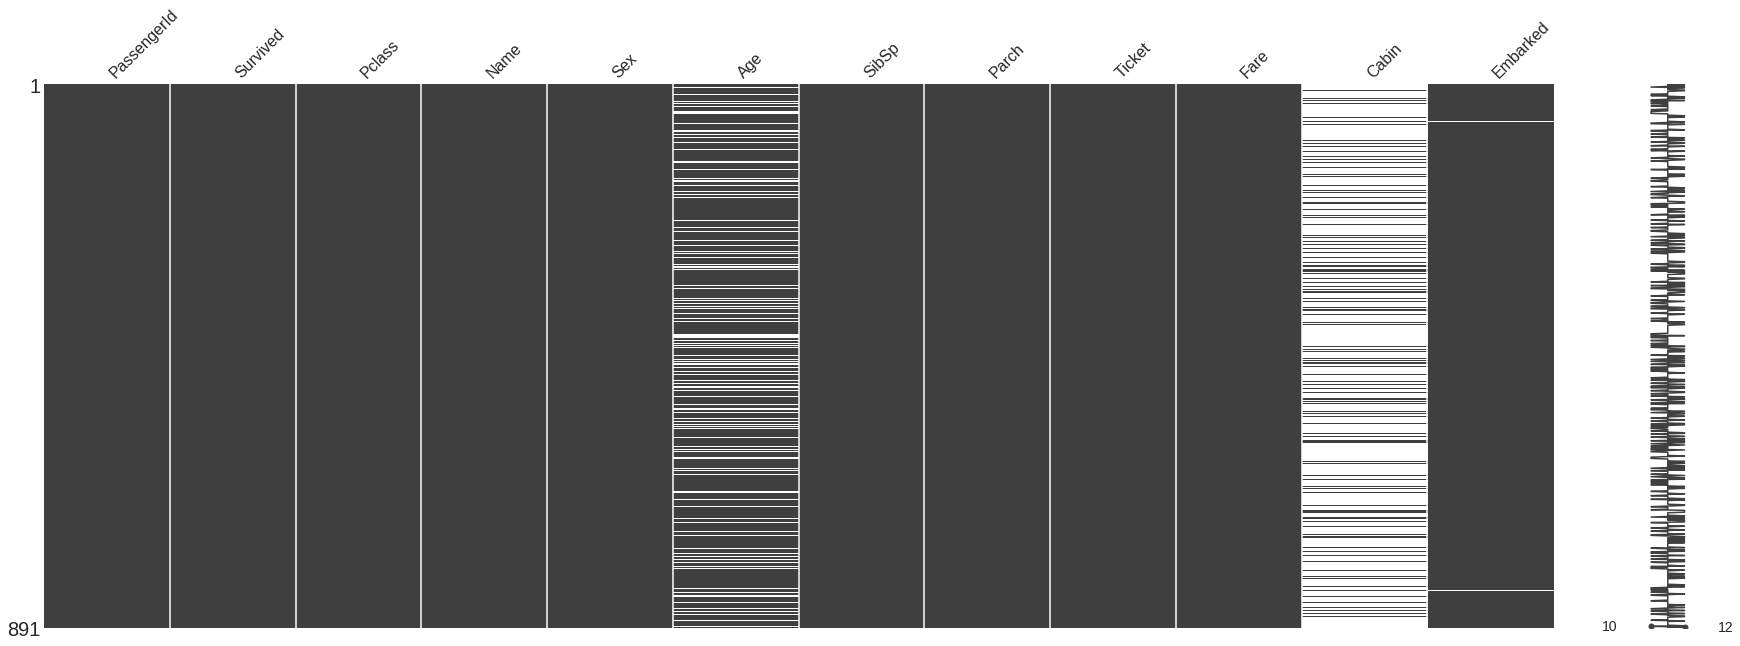

In [6]:
missingno.matrix(train, figsize=(30,10))

In [7]:
# Function to calculate the number of missing values

def missing_info(df, columns):
    """
    Finds no. of rows with NaN value or empty value
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing = {}
    n_data = len(df)
    
    for column in columns:
        total_vals = df[column].value_counts().sum()
        missing[column] = n_data - total_vals
    
    return missing       

In [8]:
missing_data = missing_info(train, columns=train.columns)
missing_data

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [9]:
df_bin = pd.DataFrame() # for discritized continuous values
df_con = pd.DataFrame() # for continuous values

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Plotting Number Of Passengers Survived**<br>
Key :
 * 0 : Not Survived
 * 1 : Survived

0    549
1    342
Name: Survived, dtype: int64


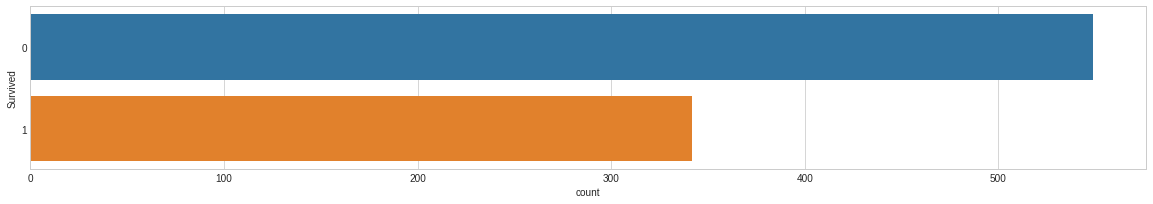

In [11]:
fig = plt.figure(figsize=(20, 3))
sns.countplot(y='Survived', data=train)
print(train['Survived'].value_counts())

In [12]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [13]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [14]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


**Feature : Ticket Class**<br>

* 1 : 1st class
* 2 : 2nd class
* 3 : 3rd class

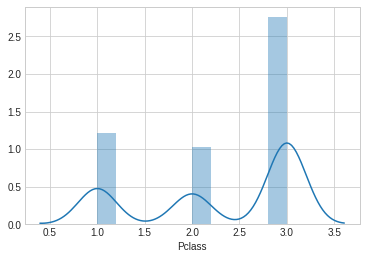

In [15]:
sns.distplot(train.Pclass)

In [16]:
missing_data['Pclass'] # no missing value

0

In [17]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

**Feature : Sex**

male      577
female    314
Name: Sex, dtype: int64


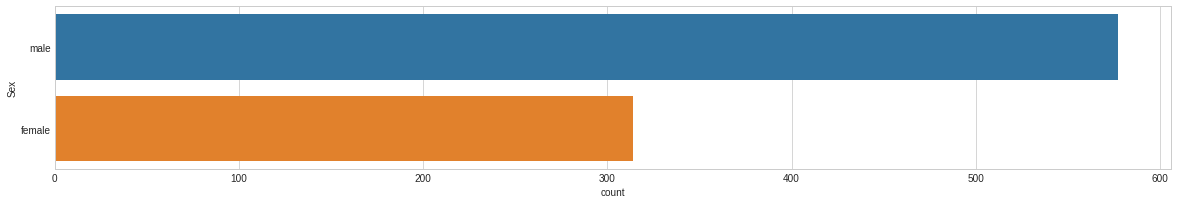

In [18]:
plt.figure(figsize=(20,3))
sns.countplot(y='Sex', data=train)
print(train['Sex'].value_counts())

In [19]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)

df_con['Sex'] = train['Sex']

In [20]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


**Comparing Sex and Survival (as both are binary)**

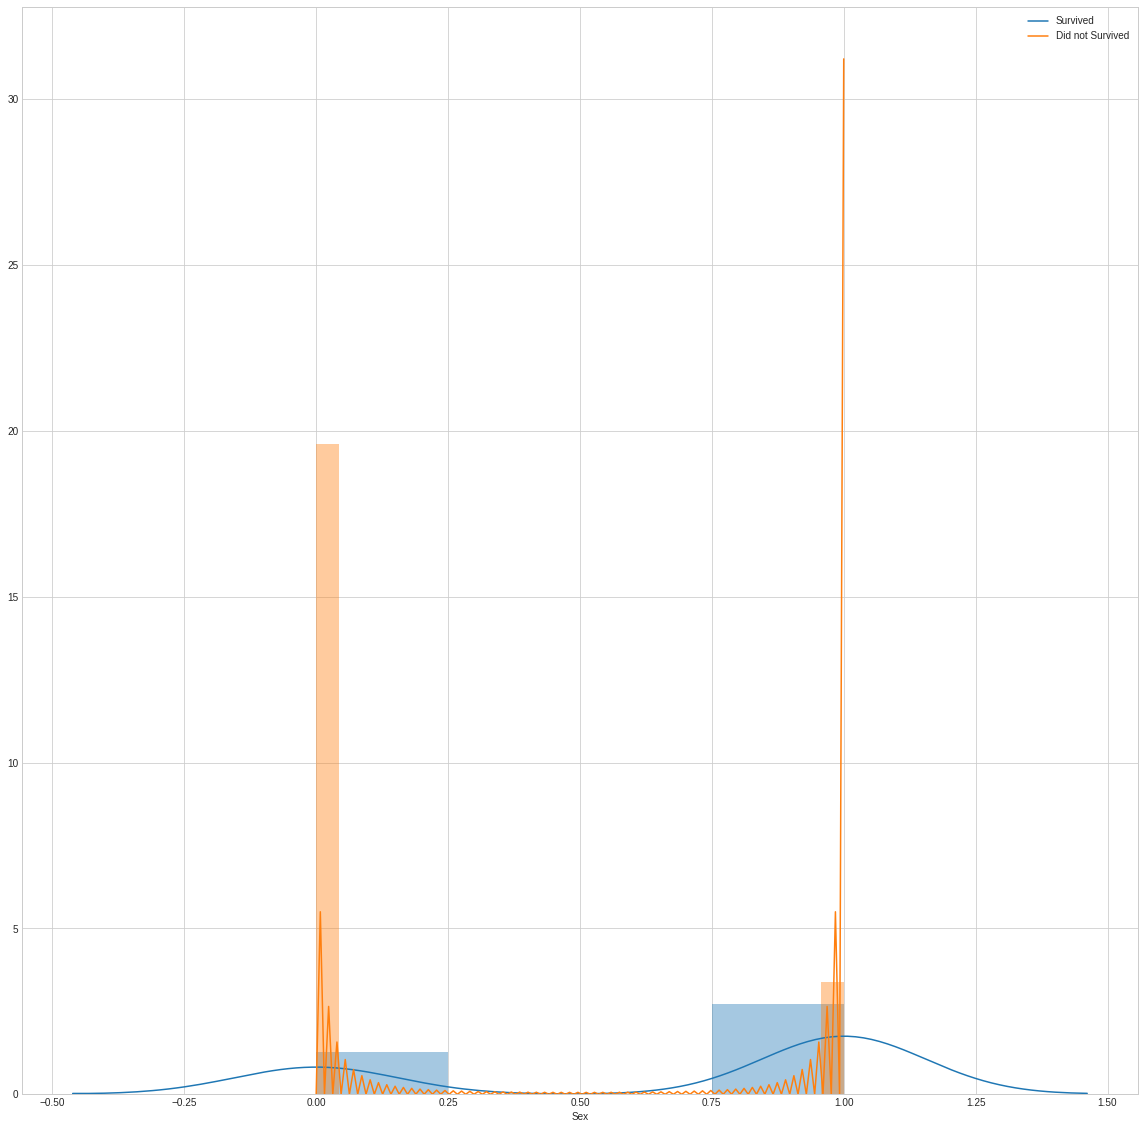

In [21]:
fig = plt.figure(figsize=(20, 20))

sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], 
             kde_kws={'label':'Survived'})

sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], 
             kde_kws={'label':'Did not Survived'})

**Fixing Missing Values in age coumns**

In [26]:
# Filling mean values in place of NaN
mean = train['Age'].mean()
train['Age'].fillna(mean, inplace=True)

In [32]:
missing_data = missing_info(train, columns=train.columns)

In [35]:
train.head(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S


In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64